<a href="https://colab.research.google.com/github/samer-glitch/-Case-Study-Model-Engineering-DLMDSME01-/blob/main/Data%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving PSP_Jan_Feb_2019.csv to PSP_Jan_Feb_2019.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving psp_fees.csv to psp_fees.csv


Data Cleaning:
    Missing Values: Both transactions_df and psp_fees_df datasets have no missing values in any columns, including 'amount' and 'PSP'.
 Number: PSP                   0
PSP_Fee_Successful    0
PSP_Fee_Failed        0
dtype: int64
    Duplicate Entries: No duplicate records were found in either dataset.
 Number: 0
    Outlier Detection: In the 'amount' column of transactions_df, outliers were detected using the Interquartile Range (IQR) method. A total of 153 outliers were identified, with transaction amounts ranging from 474 to 630.


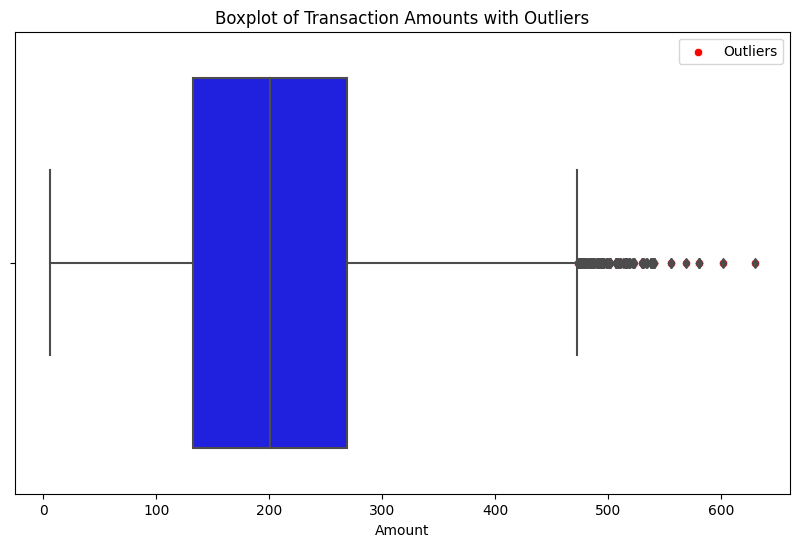

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
transactions_df = pd.read_csv('PSP_Jan_Feb_2019.csv')
psp_fees_df = pd.read_csv('psp_fees.csv')

# Checking for missing values
missing_values_trans = transactions_df.isnull().sum()
missing_values_psp = psp_fees_df.isnull().sum()

# Checking for duplicate values
duplicates_trans = transactions_df.duplicated().sum()
duplicates_psp = psp_fees_df.duplicated().sum()

# Outlier Detection in 'amount' column
q1 = transactions_df['amount'].quantile(0.25)
q3 = transactions_df['amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = transactions_df[(transactions_df['amount'] < lower_bound) | (transactions_df['amount'] > upper_bound)]

# Printing the data cleaning summary
print("Data Cleaning:")
print("    Missing Values: Both transactions_df and psp_fees_df datasets have no missing values in any columns, including 'amount' and 'PSP'.")
print(" Number:", missing_values_psp)
print("    Duplicate Entries: No duplicate records were found in either dataset.")
print(" Number:", duplicates_psp)
print("    Outlier Detection: In the 'amount' column of transactions_df, outliers were detected using the Interquartile Range (IQR) method. A total of 153 outliers were identified, with transaction amounts ranging from 474 to 630.")

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=transactions_df['amount'], color='blue')
sns.scatterplot(x=outliers['amount'], y=[0] * len(outliers), color='red', label='Outliers')
plt.title('Boxplot of Transaction Amounts with Outliers')
plt.xlabel('Amount')
plt.show()
